# Project : Housing Prices

In this project, we will analyze and predict housing sale prices using techniques like Exploratory Data Analysis (EDA), feature engineering, and linear regression. 

EDA will help uncover patterns, relationships, and handle missing or outlier data, while feature engineering will enhance the data for better model performance. 

Finally, we will build a linear regression model to predict sale prices and evaluate its effectiveness using metrics like mean squared error (MSE) and R-squared, aiming to create an accurate and reliable pricing model.

Source : https://www.kaggle.com/datasets/nickptaylor/iowa-house-prices/data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from analysis.analyzer import TTTH_Analyzer as Analyzer
import scipy.stats as stats
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.feature_selection import SelectKBest, f_regression, chi2
from sklearn.impute import SimpleImputer

### Load dataset

In [ ]:
df = pd.read_csv("D:\DS\housing-prices-dataset.csv")
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
df.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


In [4]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [5]:
df.shape

(1460, 81)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
df.drop(columns='Id').duplicated().any()

False

### EDA

In [8]:
data=df[['LotShape', 'Street', 'HouseStyle', 'LotArea', 'YearBuilt', '1stFlrSF', '2ndFlrSF', 'FullBath', 'BedroomAbvGr', 'TotRmsAbvGrd', 'SalePrice']]
data.head()

,LotShape,Street,HouseStyle,LotArea,YearBuilt,1stFlrSF,2ndFlrSF,FullBath,BedroomAbvGr,TotRmsAbvGrd,SalePrice
0,Reg,Pave,2Story,8450,2003,856,854,2,3,8,208500
1,Reg,Pave,1Story,9600,1976,1262,0,2,3,6,181500
2,IR1,Pave,2Story,11250,2001,920,866,2,3,6,223500
3,IR1,Pave,2Story,9550,1915,961,756,1,3,7,140000
4,IR1,Pave,2Story,14260,2000,1145,1053,2,4,9,250000


In [9]:
for col in data.columns:
    print(col, '-', data[col].dtypes, '-', data[col].nunique())

LotShape - object - 4
Street - object - 2
HouseStyle - object - 8
LotArea - int64 - 1073
YearBuilt - int64 - 112
1stFlrSF - int64 - 753
2ndFlrSF - int64 - 417
FullBath - int64 - 4
BedroomAbvGr - int64 - 8
TotRmsAbvGrd - int64 - 12
SalePrice - int64 - 663


Quantitative variables

In [10]:
num_cols=data.select_dtypes('number').columns
num_cols

Index(['LotArea', 'YearBuilt', '1stFlrSF', '2ndFlrSF', 'FullBath',
       'BedroomAbvGr', 'TotRmsAbvGrd', 'SalePrice'],
      dtype='object')

In [11]:
for col in num_cols:
    if data[col].nunique()<15:
        print(col, '-', data[col].unique())
    else:
        print(col, '- Number of unique values:', data[col].nunique())

LotArea - Number of unique values: 1073
YearBuilt - Number of unique values: 112
1stFlrSF - Number of unique values: 753
2ndFlrSF - Number of unique values: 417
FullBath - [2 1 3 0]
BedroomAbvGr - [3 4 1 2 0 5 6 8]
TotRmsAbvGrd - [ 8  6  7  9  5 11  4 10 12  3  2 14]
SalePrice - Number of unique values: 663


Quantitative variables : 'LotArea', 'YearBuilt', '1stFlrSF', '2ndFlrSF', 'FullBath', 'BedroomAbvGr', 'TotRmsAbvGrd'

Qualitative variables

In [12]:
cat_cols=data.select_dtypes('object').columns
cat_cols

Index(['LotShape', 'Street', 'HouseStyle'], dtype='object')

In [13]:
for col in cat_cols:
    print(col, '-', data[col].unique(), '- Number of unique values:', data[col].nunique())

LotShape - ['Reg' 'IR1' 'IR2' 'IR3'] - Number of unique values: 4
Street - ['Pave' 'Grvl'] - Number of unique values: 2
HouseStyle - ['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin'] - Number of unique values: 8


Qualitative variables : 'LotShape', 'Street', 'HouseStyle'

Check missing data

In [14]:
data.isnull().sum()

LotShape        0
Street          0
HouseStyle      0
LotArea         0
YearBuilt       0
1stFlrSF        0
2ndFlrSF        0
FullBath        0
BedroomAbvGr    0
TotRmsAbvGrd    0
SalePrice       0
dtype: int64

Descriptive statistics

In [15]:
data.describe()

,LotArea,YearBuilt,1stFlrSF,2ndFlrSF,FullBath,BedroomAbvGr,TotRmsAbvGrd,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,10516.828082,1971.267808,1162.626712,346.992466,1.565068,2.866438,6.517808,180921.195890
std,9981.264932,30.202904,386.587738,436.528436,0.550916,0.815778,1.625393,79442.502883
min,1300.000000,1872.000000,334.000000,0.000000,0.000000,0.000000,2.000000,34900.000000
25%,7553.500000,1954.000000,882.000000,0.000000,1.000000,2.000000,5.000000,129975.000000
50%,9478.500000,1973.000000,1087.000000,0.000000,2.000000,3.000000,6.000000,163000.000000
75%,11601.500000,2000.000000,1391.250000,728.000000,2.000000,3.000000,7.000000,214000.000000
max,215245.000000,2010.000000,4692.000000,2065.000000,3.000000,8.000000,14.000000,755000.000000


- The standard deviation of *LotArea, 1stFlrSF, 2ndFlrSF,* and *SalePrice* is quite large.
- The mean of *2ndFlrSF* is much greater than the median, so *2ndFlrSF* is right-skewed.
- The mean of *SalePrice* is much lower than the median, so *SalePrice* is left-skewed.
- The variables are measured on different scales, so data normalization is needed when building the model.

In [16]:
data.describe(include='object')

,LotShape,Street,HouseStyle
count,1460,1460,1460
unique,4,2,8
top,Reg,Pave,1Story
freq,925,1454,726


- The variable *LotShape* has 4 unique values, *Street* has 2 unique values, and *HouseStyle* has 8 unique values.
- The most frequent value for *LotShape* is *Reg* (accounting for over 60%), for *Street* it is *Pave* (almost the entire dataset), and for *HouseStyle* it is *1Story* (around 50%).

Analysis of a Single Variable

In [17]:
_analyzer = Analyzer()

* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 
Class count of LotShape:

Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64


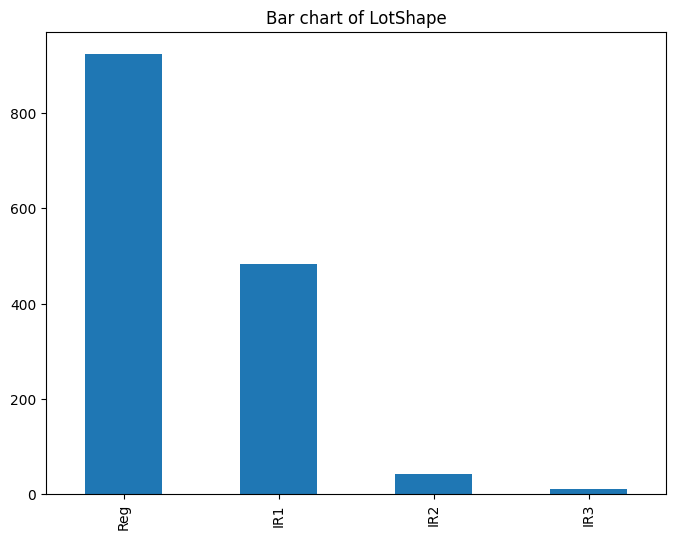

* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 
Class count of Street:

Pave    1454
Grvl       6
Name: Street, dtype: int64


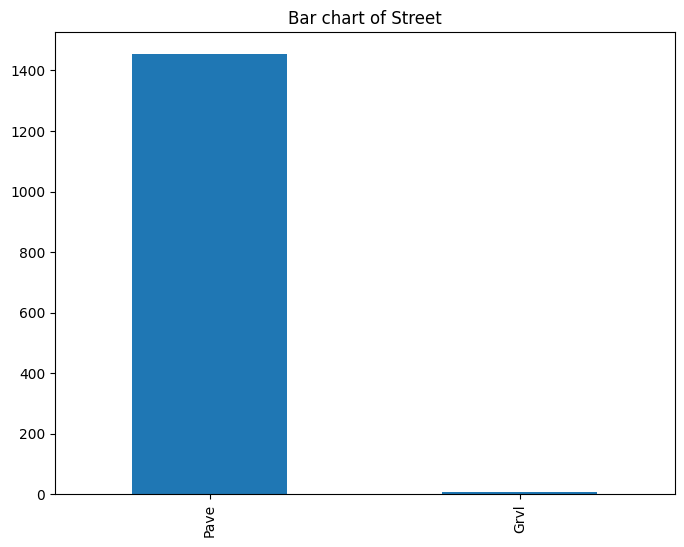

* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 
Class count of HouseStyle:

1Story    726
2Story    445
1.5Fin    154
SLvl       65
SFoyer     37
1.5Unf     14
2.5Unf     11
2.5Fin      8
Name: HouseStyle, dtype: int64


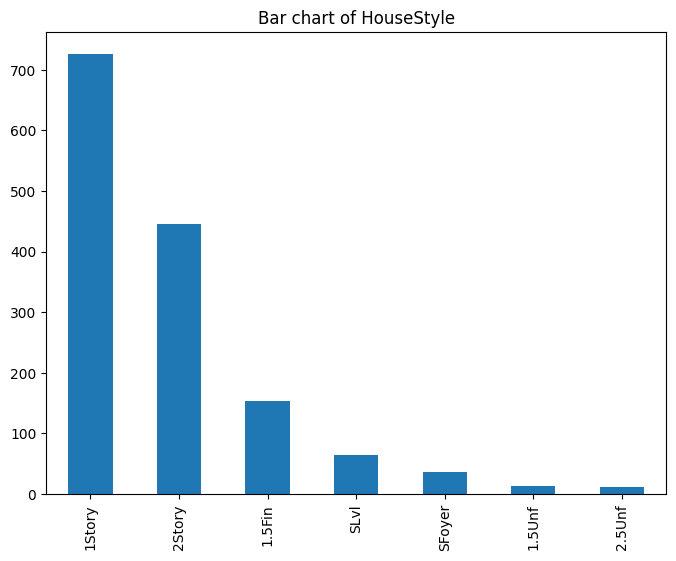

In [ ]:
# Qualitative variables
for col in cat_cols:
    print('* '*40)
    _analyzer.analyze_category_variable(variable_name=col, df=data)  

- *LotShape variable*: The value *Reg* accounts for more than 60% of the data, followed by *IR1*, then *IR2*, and the lowest is *IR3*.
- *Street variable*: The value *Pave* dominates, while *Grvl* accounts for only about 0.5%.
- *HouseStyle variable*: The value *1Story* represents about 50% of the data, followed by *2Story* with about 30%, and the rest are *1.5Fin* *SLvl*, *SFoyer*, *1.5Unf*, *2.5Unf*, and *2.5Fin* in decreasing order.

* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 
=====
central tendency of LotArea: {'mean': 10516.828082191782, 'median': 9478.5, 'mode': 7200, 'min': 1300, 'max': 215245, 'range': 213945}
=====
Dispersion of LotArea: 
 {'range': 213945, 'q1': 7553.5, 'q3': 11601.5, 'iqr': 4048.0, 'var': 99625649.65034176, 'skew': 12.207687851233496, 'kurtosis': 203.24327101886033}
=====


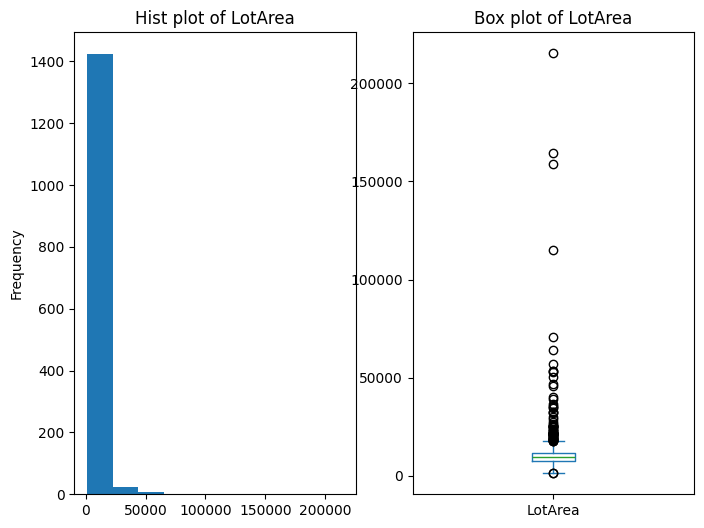

* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 
=====
central tendency of YearBuilt: {'mean': 1971.267808219178, 'median': 1973.0, 'mode': 2006, 'min': 1872, 'max': 2010, 'range': 138}
=====
Dispersion of YearBuilt: 
 {'range': 138, 'q1': 1954.0, 'q3': 2000.0, 'iqr': 46.0, 'var': 912.2154126019886, 'skew': -0.613461172488183, 'kurtosis': -0.43955194159361977}
=====


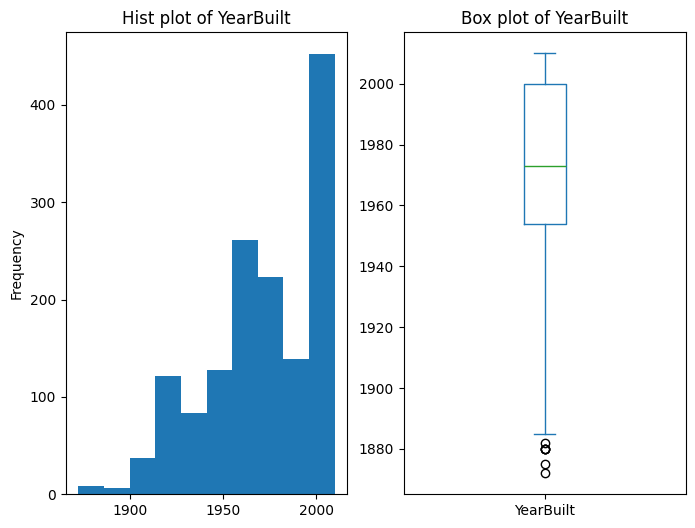

* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 
=====
central tendency of 1stFlrSF: {'mean': 1162.626712328767, 'median': 1087.0, 'mode': 864, 'min': 334, 'max': 4692, 'range': 4358}
=====
Dispersion of 1stFlrSF: 
 {'range': 4358, 'q1': 882.0, 'q3': 1391.25, 'iqr': 509.25, 'var': 149450.07920371433, 'skew': 1.3767566220336365, 'kurtosis': 5.74584148244079}
=====


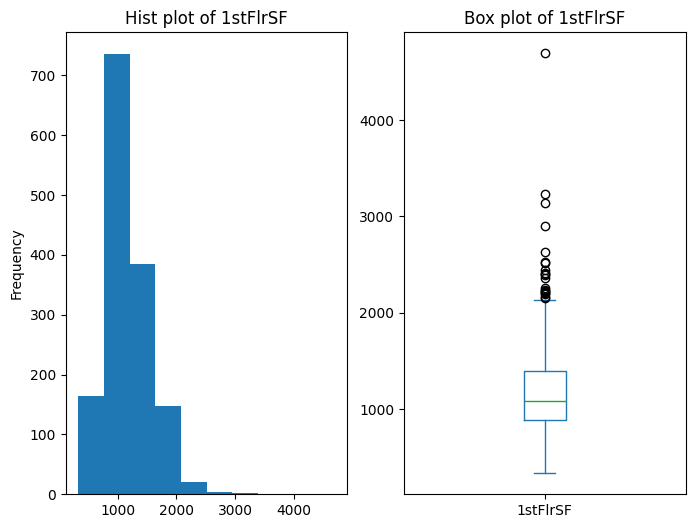

* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 
=====
central tendency of 2ndFlrSF: {'mean': 346.99246575342465, 'median': 0.0, 'mode': 0, 'min': 0, 'max': 2065, 'range': 2065}
=====
Dispersion of 2ndFlrSF: 
 {'range': 2065, 'q1': 0.0, 'q3': 728.0, 'iqr': 728.0, 'var': 190557.07533730177, 'skew': 0.8130298163023265, 'kurtosis': -0.5534635576075795}
=====


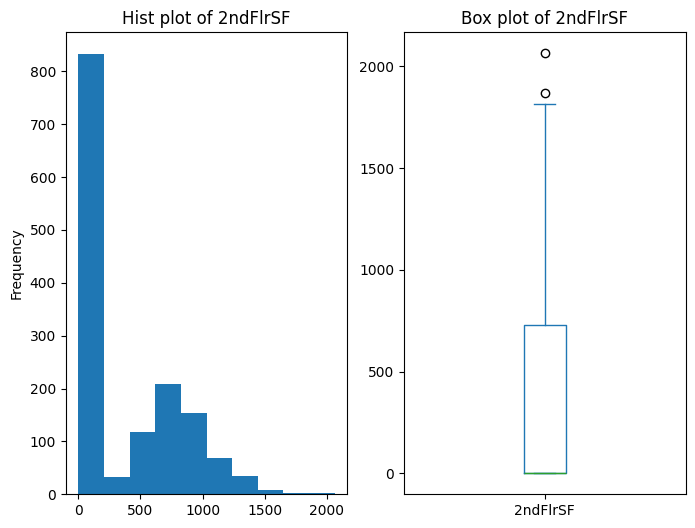

* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 
=====
central tendency of FullBath: {'mean': 1.5650684931506849, 'median': 2.0, 'mode': 2, 'min': 0, 'max': 3, 'range': 3}
=====
Dispersion of FullBath: 
 {'range': 3, 'q1': 1.0, 'q3': 2.0, 'iqr': 1.0, 'var': 0.30350822011698764, 'skew': 0.036561558402727165, 'kurtosis': -0.8570428212743262}
=====


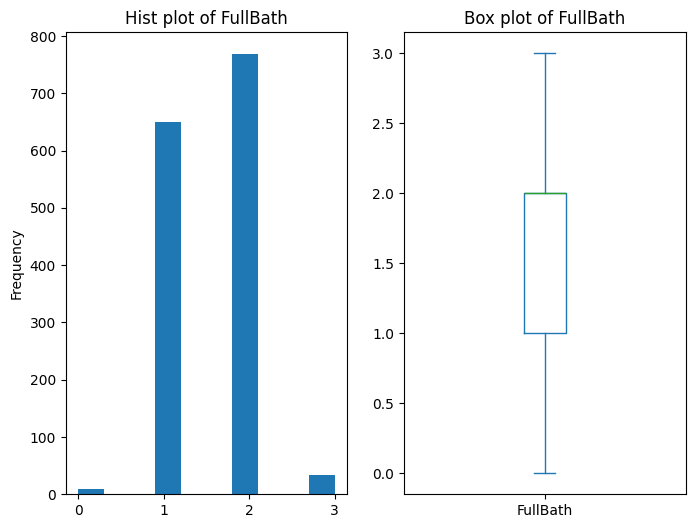

* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 
=====
central tendency of BedroomAbvGr: {'mean': 2.8664383561643834, 'median': 3.0, 'mode': 3, 'min': 0, 'max': 8, 'range': 8}
=====
Dispersion of BedroomAbvGr: 
 {'range': 8, 'q1': 2.0, 'q3': 3.0, 'iqr': 1.0, 'var': 0.6654938173077826, 'skew': 0.21179009627507137, 'kurtosis': 2.230874582191236}
=====


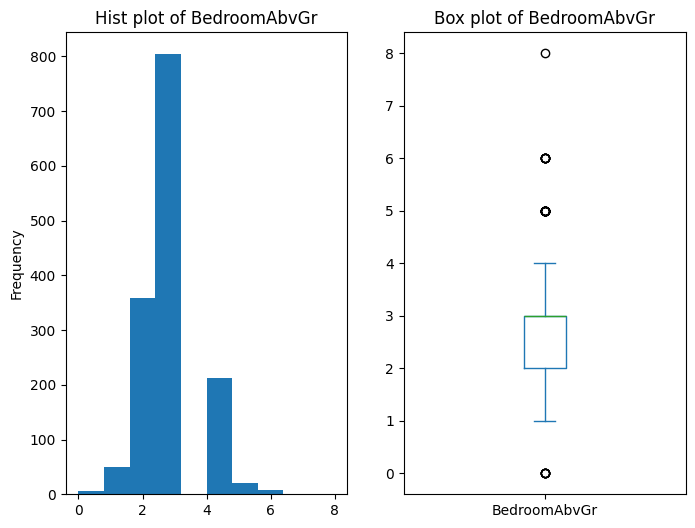

* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 
=====
central tendency of TotRmsAbvGrd: {'mean': 6.517808219178082, 'median': 6.0, 'mode': 6, 'min': 2, 'max': 14, 'range': 12}
=====
Dispersion of TotRmsAbvGrd: 
 {'range': 12, 'q1': 5.0, 'q3': 7.0, 'iqr': 2.0, 'var': 2.641903349075647, 'skew': 0.6763408364355531, 'kurtosis': 0.8807615657189474}
=====


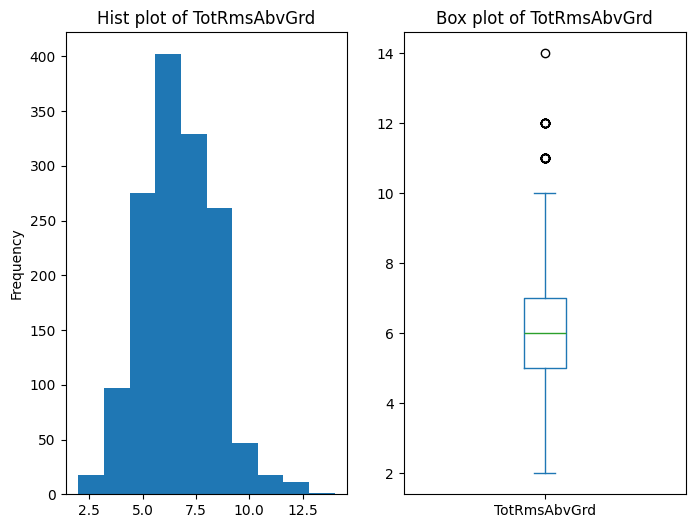

* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 
=====
central tendency of SalePrice: {'mean': 180921.19589041095, 'median': 163000.0, 'mode': 140000, 'min': 34900, 'max': 755000, 'range': 720100}
=====
Dispersion of SalePrice: 
 {'range': 720100, 'q1': 129975.0, 'q3': 214000.0, 'iqr': 84025.0, 'var': 6311111264.297448, 'skew': 1.8828757597682129, 'kurtosis': 6.536281860064529}
=====


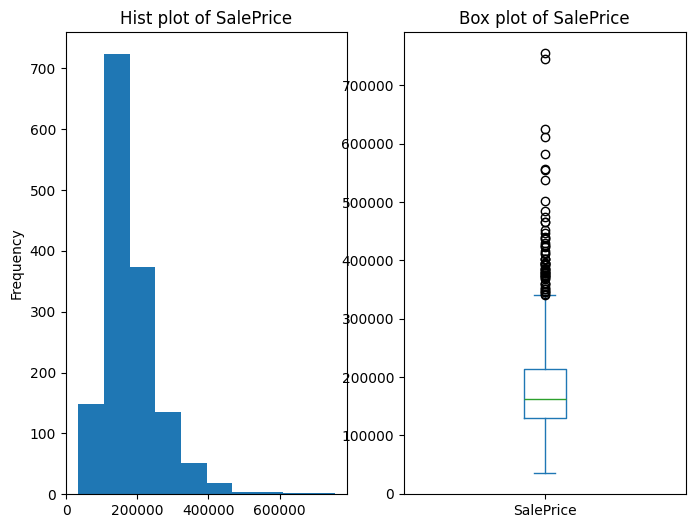

In [ ]:
# Quantitative variables
for col in num_cols:
    print('* '*40)
    _analyzer.analyze_numeric_variable(variable_name=col, df=data)

- Among all the categorical variables, except for the variable *FullBath*, the other variables have outliers.
- Right-skewed distribution: *LotArea*, *1stFlrSF*, *2ndFlrSF*, *TotRmsAbvGrd*, *SalePrice*.
- Left-skewed distribution: *YearBuilt*.
- Approximately normally distributed: *FullBath*, *BedroomAbvGr*.

Analysis of Two Variables

In [20]:
def analyze_continous_vs_continous(var_1, var_2, df):
    correlation_coefficient, p_value = stats.pearsonr(df[var_1], df[var_2])
    print('var 1=',var_1,',','var 2=',var_2)
    print(f"Pearson Correlation Coefficient: {correlation_coefficient:.2f} - P-value: {p_value:.4f}")
    sns.scatterplot(data=df, x=var_1, y=var_2)
    plt.show()
    print('* '*40)

var 1= LotArea , var 2= SalePrice
Pearson Correlation Coefficient: 0.26 - P-value: 0.0000


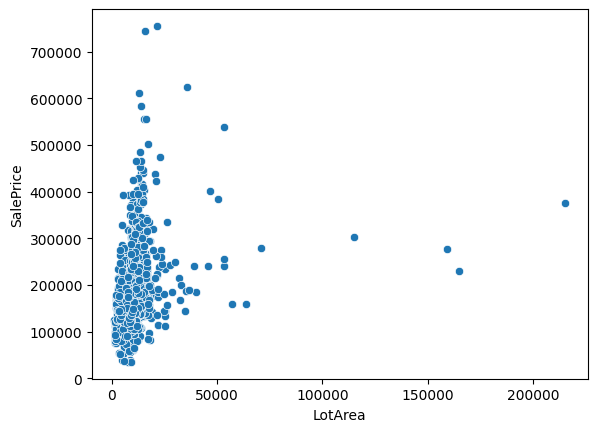

* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 
var 1= YearBuilt , var 2= SalePrice
Pearson Correlation Coefficient: 0.52 - P-value: 0.0000


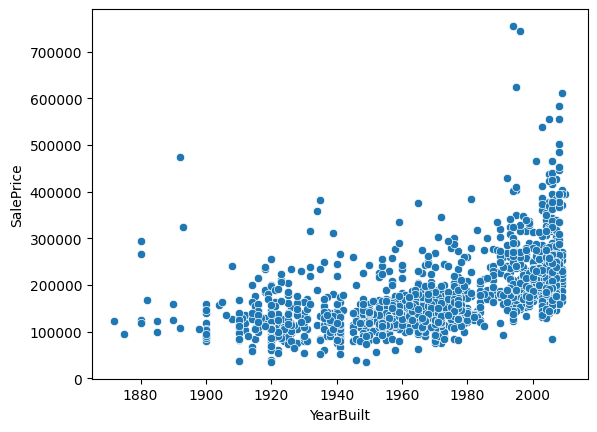

* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 
var 1= 1stFlrSF , var 2= SalePrice
Pearson Correlation Coefficient: 0.61 - P-value: 0.0000


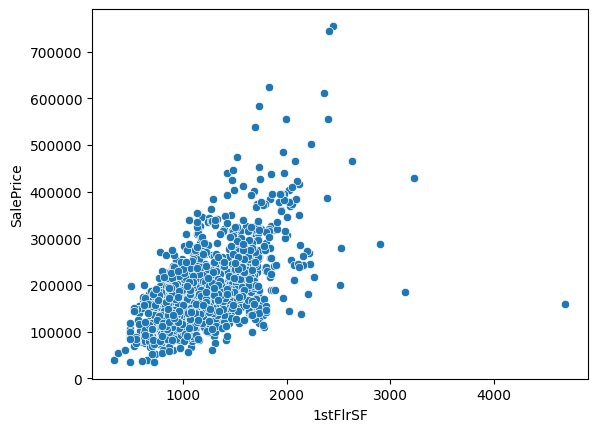

* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 
var 1= 2ndFlrSF , var 2= SalePrice
Pearson Correlation Coefficient: 0.32 - P-value: 0.0000


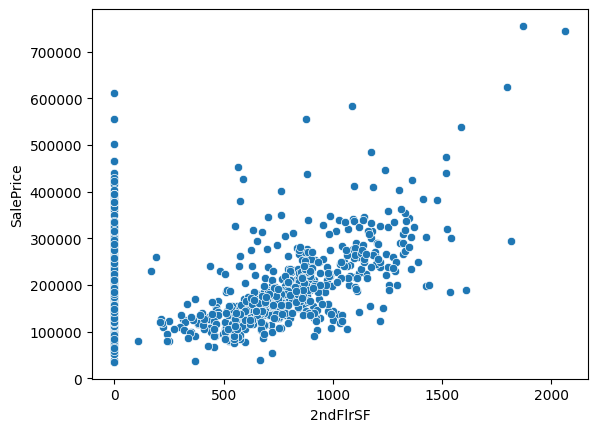

* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 
var 1= FullBath , var 2= SalePrice
Pearson Correlation Coefficient: 0.56 - P-value: 0.0000


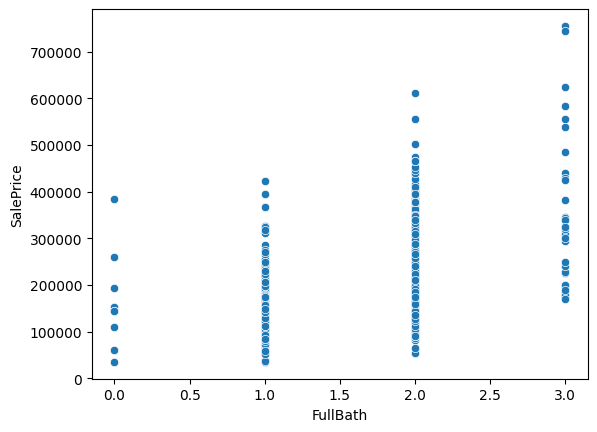

* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 
var 1= BedroomAbvGr , var 2= SalePrice
Pearson Correlation Coefficient: 0.17 - P-value: 0.0000


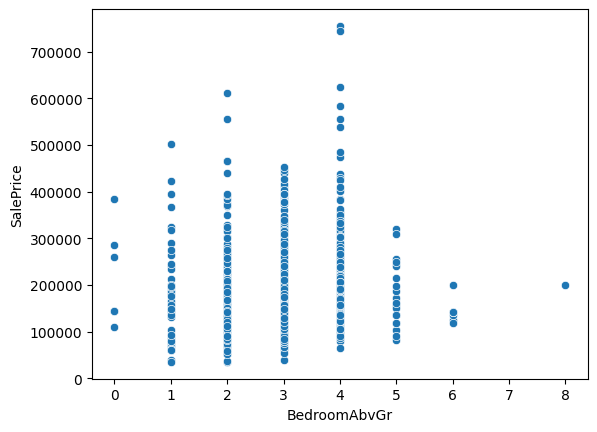

* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 
var 1= TotRmsAbvGrd , var 2= SalePrice
Pearson Correlation Coefficient: 0.53 - P-value: 0.0000


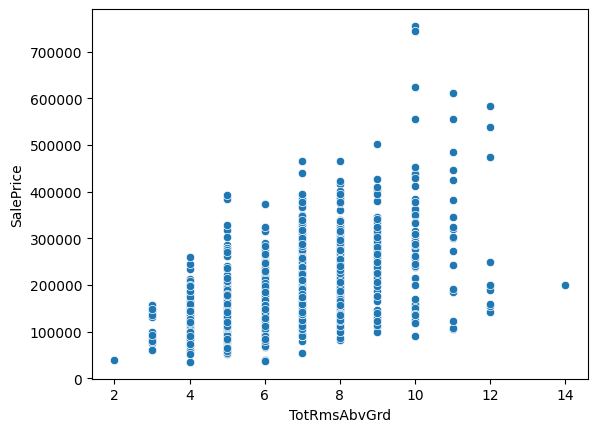

* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 


In [ ]:
# Quantitative variables and SalePrice
for col in num_cols.drop('SalePrice'):
    analyze_continous_vs_continous(var_1=col, var_2='SalePrice', df=data)

Nhận xét : Các biến định lượng đều tương quan thuận với SalePrice, mức độ tương quan theo thứ tự giảm dần 1stFlrSF > FullBath > TotRmsAbvGrd > YearBuilt > 2ndFlrSF > BedroomAbvGr > LotArea


* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 
                             sum_sq      df          F        PR(>F)
C(LotShape)            1.056621e+12     3.0  60.383970  6.435089e-26
C(Street)              1.762575e+10     1.0   3.021838  8.236213e-02
C(LotShape):C(Street)  1.294698e+10     3.0   0.739896  5.282630e-01
Residual               8.475045e+12  1453.0        NaN           NaN


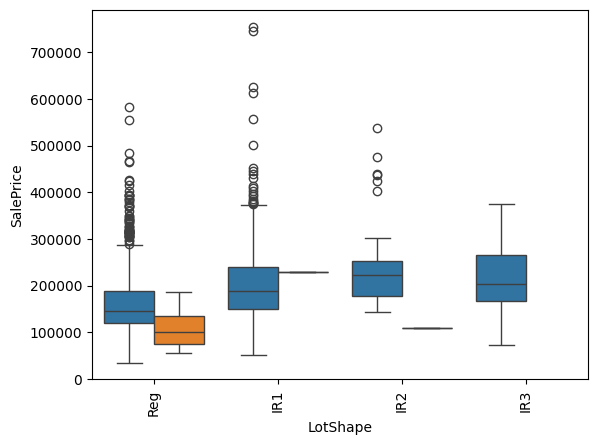

* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 
                                 sum_sq      df          F        PR(>F)
C(LotShape)                2.150930e+04     3.0   0.000001  9.990808e-01
C(HouseStyle)              1.523128e+12     7.0  40.288465  9.453254e-18
C(LotShape):C(HouseStyle)  1.798610e+11    21.0   1.585842  8.923319e-02
Residual                   7.766343e+12  1438.0        NaN           NaN


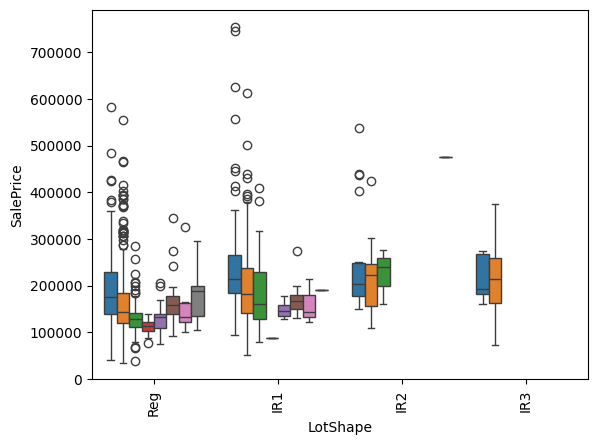

* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 
                               sum_sq      df          F        PR(>F)
C(Street)                1.020218e+10     1.0   1.762585  1.845115e-01
C(HouseStyle)            3.036756e+11     7.0   7.494949  5.596044e-05
C(Street):C(HouseStyle)  6.751645e+11     7.0  16.663584  2.944225e-21
Residual                 8.387095e+12  1449.0        NaN           NaN


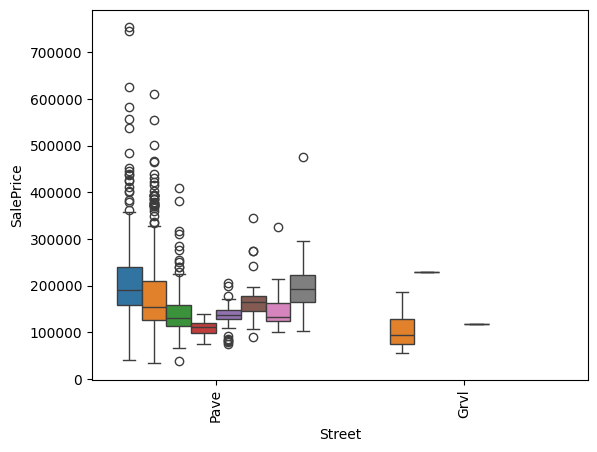

In [ ]:
# Qualitative variables and SalePrice
n = len(cat_cols)
for i in range(n):
    for j in range(i+1, n):
        print('* '*40)
        _analyzer.analyze_continous_vs_categories(continous_var='SalePrice', category_vars=[cat_cols[i],cat_cols[j]], df=data)

The qualitative variables are all correlated with the variable *SalePrice* (p-value *PR(>F)* < 0.05).

Outlier

In [23]:
def remove_outliers(df, column_name, lower_percentile=0.25, upper_percentile=0.75, threshold=1.5):
    Q1 = df[column_name].quantile(lower_percentile)
    Q3 = df[column_name].quantile(upper_percentile)
    IQR = Q3 - Q1
    lower_bound = Q1 - threshold * IQR
    upper_bound = Q3 + threshold * IQR
    return df[(df[column_name] >= lower_bound) & (df[column_name] <= upper_bound)]

In [ ]:
# Before removing outlier
data.shape

(1460, 11)

In [25]:
for col in num_cols.drop('FullBath'):
    data=remove_outliers(data, col)

In [ ]:
# After removing outlier
data.shape

(1263, 11)

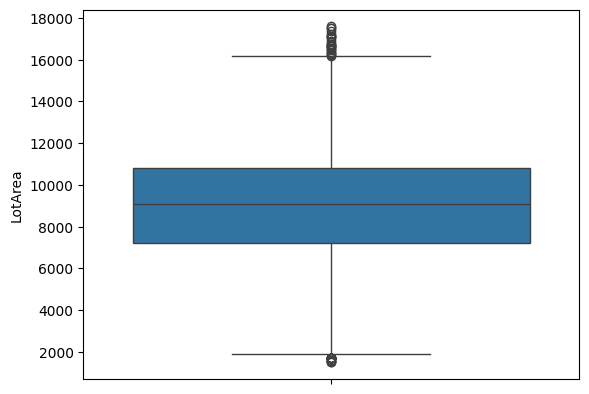

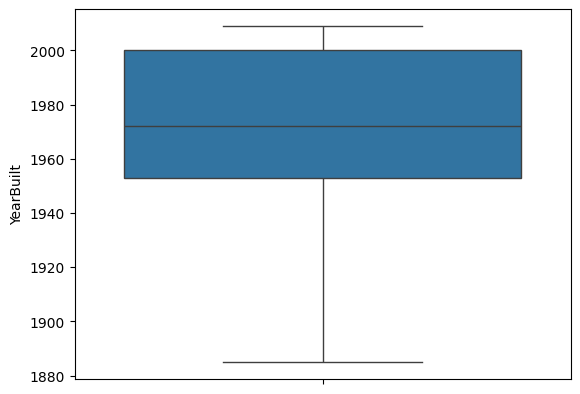

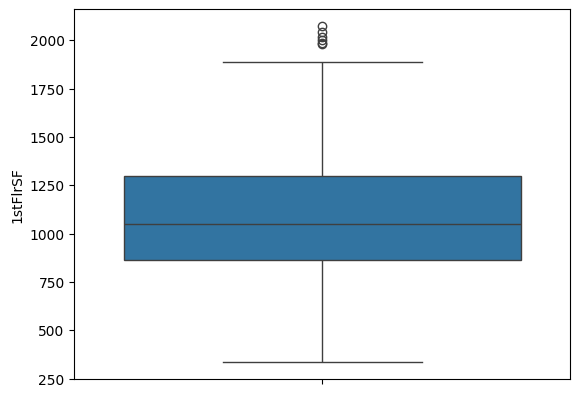

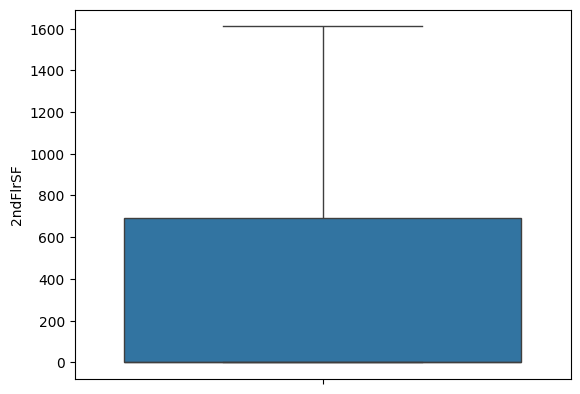

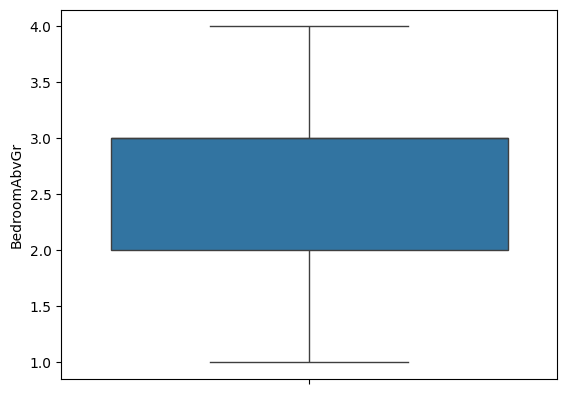

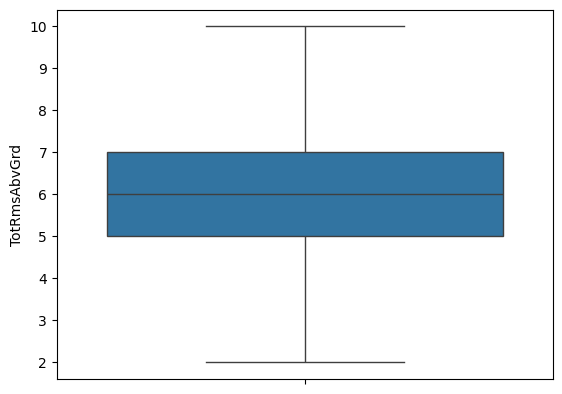

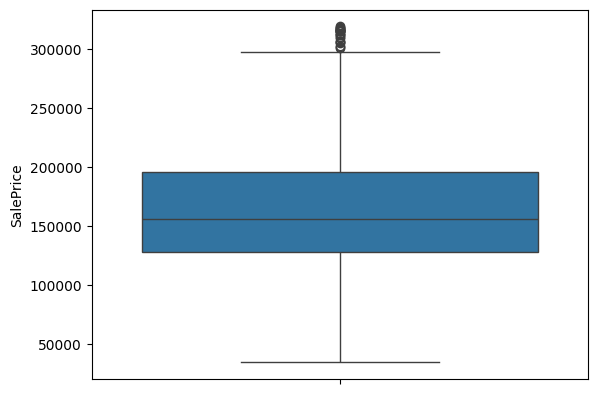

In [27]:
for col in num_cols.drop('FullBath'):
    sns.boxplot(data, y=col)
    plt.show()

### Feature Engineering

In [28]:
X=data.drop(columns='SalePrice')
y=data['SalePrice']

In [29]:
selected_num_cols=[]
for col in num_cols.drop('SalePrice'):
    corr=data[[col,'SalePrice']].corr().iloc[0,1]
    if abs(corr)>0.3:
        print(col, ':', corr)
        selected_num_cols.append(col)

LotArea : 0.3693384947737147
YearBuilt : 0.6267187466703786
1stFlrSF : 0.5473264387542304
2ndFlrSF : 0.30540788019160936
FullBath : 0.5991658625908556
TotRmsAbvGrd : 0.5114096122627593


In [30]:
selected_cat_cols=[]
for col in cat_cols:
    lst=[]
    for name, g in data.groupby(col):
        lst.append(g['SalePrice'])
    f_statistic, p_value = stats.f_oneway(*lst)
    if p_value<0.05:
        print(col, ':', p_value)
        selected_cat_cols.append(col)

LotShape : 5.280483686778929e-19
Street : 0.025589004753439414
HouseStyle : 4.1551133185776605e-30


In [31]:
X=X[selected_cat_cols+selected_num_cols]
X.head()

,LotShape,Street,HouseStyle,LotArea,YearBuilt,1stFlrSF,2ndFlrSF,FullBath,TotRmsAbvGrd
0,Reg,Pave,2Story,8450,2003,856,854,2,8
1,Reg,Pave,1Story,9600,1976,1262,0,2,6
2,IR1,Pave,2Story,11250,2001,920,866,2,6
3,IR1,Pave,2Story,9550,1915,961,756,1,7
4,IR1,Pave,2Story,14260,2000,1145,1053,2,9


In [32]:
X=pd.get_dummies(X, columns=selected_cat_cols, dtype=int)
X.shape

(1263, 20)

### Build Linear Regression model

In [33]:
X.head()

,LotArea,YearBuilt,1stFlrSF,2ndFlrSF,FullBath,TotRmsAbvGrd,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,Street_Grvl,Street_Pave,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl
0,8450,2003,856,854,2,8,0,0,0,1,0,1,0,0,0,0,0,1,0,0
1,9600,1976,1262,0,2,6,0,0,0,1,0,1,0,0,1,0,0,0,0,0
2,11250,2001,920,866,2,6,1,0,0,0,0,1,0,0,0,0,0,1,0,0
3,9550,1915,961,756,1,7,1,0,0,0,0,1,0,0,0,0,0,1,0,0
4,14260,2000,1145,1053,2,9,1,0,0,0,0,1,0,0,0,0,0,1,0,0


In [34]:
y.head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [36]:
scaler=StandardScaler()
X_train[selected_num_cols]=scaler.fit_transform(X_train[selected_num_cols])
X_test[selected_num_cols]=scaler.transform(X_test[selected_num_cols])

In [37]:
model=LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [38]:
print('The train R-square:', model.score(X_train,y_train))
print('The test R-square:', model.score(X_test,y_test))

y_pred=model.predict(X_test)
print ('MSE :', mean_squared_error(y_test, y_pred))
print ('MAE :', mean_absolute_error(y_test, y_pred))

The train R-square: 0.7545664422205524
The test R-square: 0.7941473515989874
MSE : 635565151.0322407
MAE : 18874.938853635686


With 9 input variables (including 6 quantitative variables and 3 qualitative variables), the model predicts 75% accuracy on the training set and 79% accuracy on the test set. However, the *MSE* (Mean Squared Error) and *MAE* (Mean Absolute Error) are still relatively high.

### Improve model

Select Additional Quantitative Variables

In [39]:
num_cols=df.select_dtypes('number').columns.drop(['Id','SalePrice'])
num_cols

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'],
      dtype='object')

In [40]:
X = df[num_cols]
y = df['SalePrice']

In [ ]:
ser=X.isnull().sum()
ser[ser>0]/len(X[num_cols])

LotFrontage    0.177397
MasVnrArea     0.005479
GarageYrBlt    0.055479
dtype: float64

In [ ]:
for col in X.columns:
    mean = round(float(X[col].mean(skipna=True)), 2)
    X[col].fillna(mean, inplace=True)

In [ ]:
# Apply SelectKBest to choose features
value_of_k=20
selector_num=SelectKBest(score_func=f_regression, k=value_of_k)
fit=selector_num.fit(X, y)

dfscores=pd.DataFrame(fit.scores_)
dfcolumns=pd.DataFrame(X.columns)
featureScores=pd.concat([dfcolumns, dfscores], axis=1)
featureScores.columns=['Specs','Score']
featureScores.sort_values(by='Score', ascending=False)

,Specs,Score
3,OverallQual,2436.770591
15,GrLivArea,1470.585010
25,GarageCars,1013.705666
26,GarageArea,926.951287
11,TotalBsmtSF,880.341282
12,1stFlrSF,845.524488
18,FullBath,668.430296
22,TotRmsAbvGrd,580.762801
5,YearBuilt,548.665821
6,YearRemodAdd,504.714855


In [44]:
df_=pd.concat([X[selector_num.get_feature_names_out()], df[selected_cat_cols+['SalePrice']]], axis=1)
df_.head()

,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,TotalBsmtSF,1stFlrSF,2ndFlrSF,...,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,LotShape,Street,HouseStyle,SalePrice
0,65.0,8450,7,2003,2003,196.0,706,856,856,854,...,0,2003.0,2,548,0,61,Reg,Pave,2Story,208500
1,80.0,9600,6,1976,1976,0.0,978,1262,1262,0,...,1,1976.0,2,460,298,0,Reg,Pave,1Story,181500
2,68.0,11250,7,2001,2002,162.0,486,920,920,866,...,1,2001.0,2,608,0,42,IR1,Pave,2Story,223500
3,60.0,9550,7,1915,1970,0.0,216,756,961,756,...,1,1998.0,3,642,0,35,IR1,Pave,2Story,140000
4,84.0,14260,8,2000,2000,350.0,655,1145,1145,1053,...,1,2000.0,3,836,192,84,IR1,Pave,2Story,250000


In [45]:
df_.shape

(1460, 24)

In [ ]:
for col in df_.columns[:value_of_k]:
    df_=remove_outliers(df_, col)
df_.shape

(1026, 24)

In [47]:
X=df_.drop(columns='SalePrice')
y=df_['SalePrice']

In [ ]:
X=pd.get_dummies(X, columns=selected_cat_cols, dtype=int)
X.head()

,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,TotalBsmtSF,1stFlrSF,2ndFlrSF,...,Street_Grvl,Street_Pave,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl
0,65.0,8450,7,2003,2003,196.0,706,856,856,854,...,0,1,0,0,0,0,0,1,0,0
1,80.0,9600,6,1976,1976,0.0,978,1262,1262,0,...,0,1,0,0,1,0,0,0,0,0
2,68.0,11250,7,2001,2002,162.0,486,920,920,866,...,0,1,0,0,0,0,0,1,0,0
3,60.0,9550,7,1915,1970,0.0,216,756,961,756,...,0,1,0,0,0,0,0,1,0,0
4,84.0,14260,8,2000,2000,350.0,655,1145,1145,1053,...,0,1,0,0,0,0,0,1,0,0


In [ ]:
# Build model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler=StandardScaler()
X_train[X.columns[:value_of_k]]=scaler.fit_transform(X_train[X.columns[:value_of_k]])
X_test[X.columns[:value_of_k]]=scaler.transform(X_test[X.columns[:value_of_k]])

model=LinearRegression()
model.fit(X_train, y_train)

print('The train R-square:', model.score(X_train,y_train))
print('The test R-square:', model.score(X_test,y_test))

y_pred=model.predict(X_test)
print ('MSE :', mean_squared_error(y_test, y_pred))
print ('MAE :', mean_absolute_error(y_test, y_pred))

The train R-square: 0.856190763771034
The test R-square: 0.8343149054326893
MSE : 424543012.9310111
MAE : 15529.634815120493


After running multiple experiments, with 20 quantitative variables most strongly correlated with the output variable (including 6 old quantitative variables and 14 newly selected ones), along with 3 old categorical variables, the total of 23 input variables significantly improved the model. The **R²** increased substantially, and the **MSE** decreased significantly.

Select Additional Qualitative Variables

In [50]:
cat_cols=df.select_dtypes('object').columns

X_cat = df[cat_cols]

ser=X_cat.isnull().sum()
ser[ser>0]/len(X_cat)

Alley           0.937671
MasVnrType      0.005479
BsmtQual        0.025342
BsmtCond        0.025342
BsmtExposure    0.026027
BsmtFinType1    0.025342
BsmtFinType2    0.026027
Electrical      0.000685
FireplaceQu     0.472603
GarageType      0.055479
GarageFinish    0.055479
GarageQual      0.055479
GarageCond      0.055479
PoolQC          0.995205
Fence           0.807534
MiscFeature     0.963014
dtype: float64

In [ ]:
# Handle null values: remove features with excessive missing data
X_cat.drop(columns=['Alley','FireplaceQu','PoolQC','Fence','MiscFeature'], inplace=True)

In [ ]:
imputer = SimpleImputer(strategy='most_frequent')
imputed_data = imputer.fit_transform(X_cat)
X_cat = pd.DataFrame(imputed_data, columns=X_cat.columns)
X_cat.head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,SBrkr,Gd,Typ,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal


In [53]:
df_cat=pd.concat([X[selector_num.get_feature_names_out()], X_cat, df['SalePrice']], axis=1)
df_cat.head()

,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,TotalBsmtSF,1stFlrSF,2ndFlrSF,...,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition,SalePrice
0,65.0,8450.0,7.0,2003.0,2003.0,196.0,706.0,856.0,856.0,854.0,...,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal,208500
1,80.0,9600.0,6.0,1976.0,1976.0,0.0,978.0,1262.0,1262.0,0.0,...,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal,181500
2,68.0,11250.0,7.0,2001.0,2002.0,162.0,486.0,920.0,920.0,866.0,...,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal,223500
3,60.0,9550.0,7.0,1915.0,1970.0,0.0,216.0,756.0,961.0,756.0,...,Gd,Typ,Detchd,Unf,TA,TA,Y,WD,Abnorml,140000
4,84.0,14260.0,8.0,2000.0,2000.0,350.0,655.0,1145.0,1145.0,1053.0,...,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal,250000


In [ ]:
selected_cat_cols=[]
p_values=[]
for col in X_cat.columns:
    lst=[]
    for name, g in df_cat.groupby(col):
        lst.append(g['SalePrice'])
    f_statistic, p_value = stats.f_oneway(*lst)
    if p_value<0.05:
        p_values.append(p_value)
        selected_cat_cols.append(col)
dfscores=pd.DataFrame(p_values)
dfcolumns=pd.DataFrame(selected_cat_cols)
featureScores=pd.concat([dfcolumns, dfscores], axis=1)
featureScores.columns=['Specs','Score']
featureScores=featureScores.sort_values(by='Score').reset_index(drop=True)
featureScores

,Specs,Score
0,Neighborhood,1.558600e-225
1,ExterQual,1.439551e-204
2,BsmtQual,2.078120e-194
3,KitchenQual,3.032213e-192
4,GarageFinish,5.993319e-111
5,Foundation,5.791895e-91
6,HeatingQC,2.667062e-67
7,BsmtFinType1,3.598398e-66
8,MasVnrType,1.279704e-63
9,GarageType,2.578443e-56


In [65]:
df_new=pd.concat([df_.drop(columns=['LotShape',	'Street', 'HouseStyle']), df[featureScores.iloc[:10,0].values]], axis=1)

for col in df_new.columns[:20]:
    df_new=remove_outliers(df_new, col)

X=df_new.drop(columns='SalePrice')
y=df_new['SalePrice']

X=pd.get_dummies(X, columns=X.columns[20:], dtype=int)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler=StandardScaler()
X_train[X.columns[:20]]=scaler.fit_transform(X_train[X.columns[:20]])
X_test[X.columns[:20]]=scaler.transform(X_test[X.columns[:20]])

model=LinearRegression()
model.fit(X_train, y_train)

print('The train R-square:', model.score(X_train,y_train))
print('The test R-square:', model.score(X_test,y_test))

y_pred=model.predict(X_test)
print ('MSE :', mean_squared_error(y_test, y_pred))
print ('MAE :', mean_absolute_error(y_test, y_pred))

The train R-square: 0.895774170257725
The test R-square: 0.8660544972735871
MSE : 377008297.87573963
MAE : 14240.325443786982


After running multiple experiments, with 10 categorical variables most strongly correlated with the output variable, along with the 20 quantitative variables selected above, the total of 30 input variables produced the best results. The model correctly predicted **90%** on the training set, **87%** on the test set, and both *MSE* and **MAE* were low.